<a href="https://colab.research.google.com/github/Git-Coder3112/CreditRiskForLoan/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_csv('german_credit_data.csv')

if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)


print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df.describe())
print(df.isnull().sum())


Shape: (1000, 9)
Columns: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375

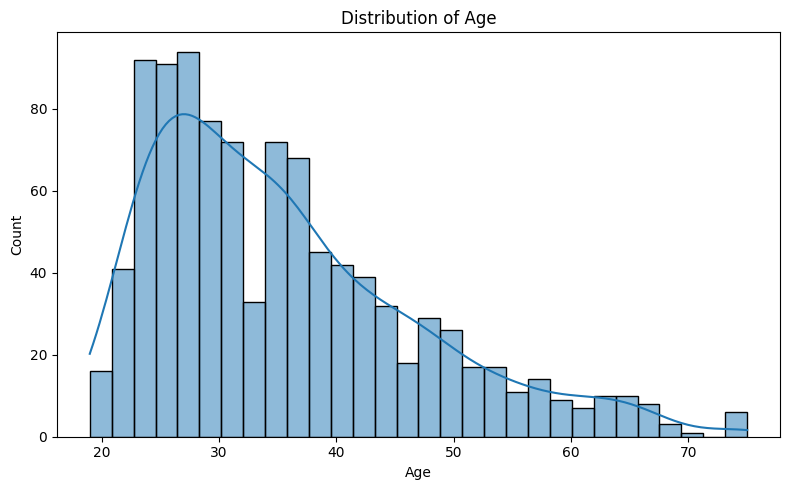

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# Forward fill (or customize as needed)
df.fillna(method='ffill', inplace=True)


In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:

df['Risk'] = np.where((df['Credit amount'] > df['Credit amount'].median()) &
                      (df['Duration'] > df['Duration'].median()), 1, 0)  # 1 = Bad, 0 = Good


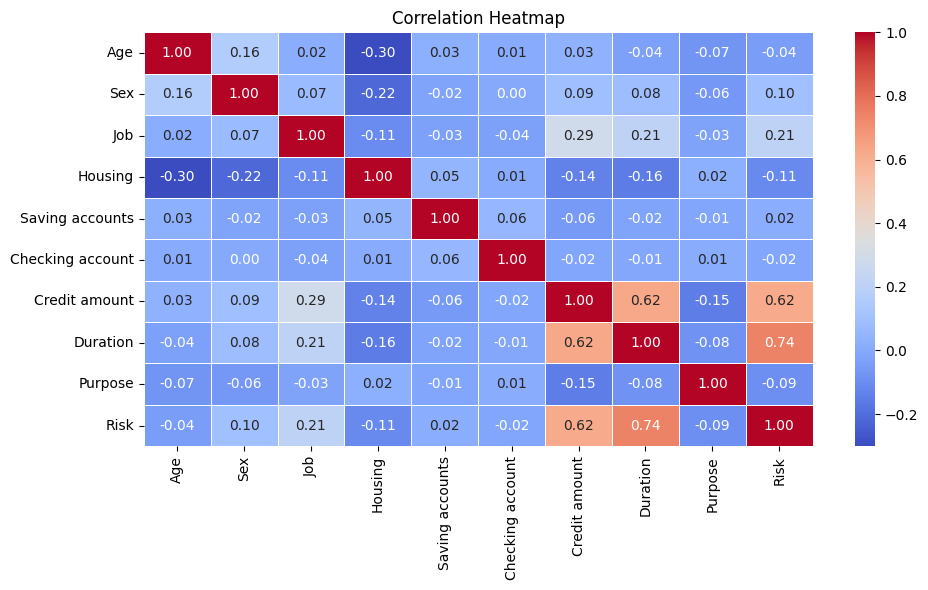

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


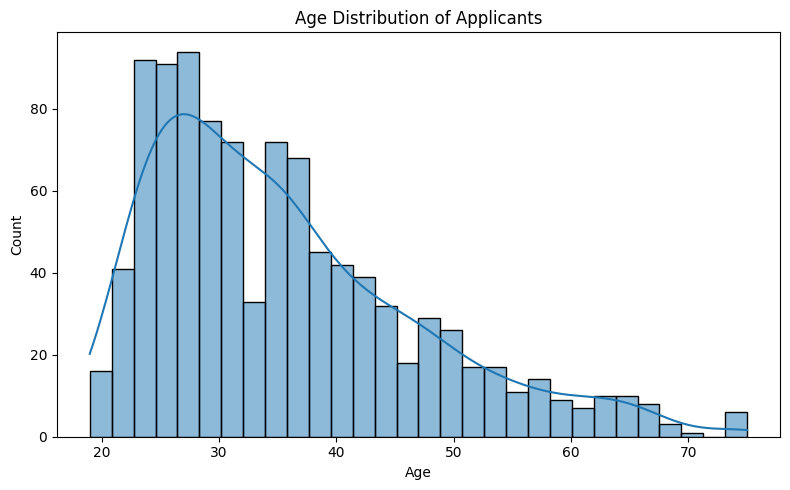

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


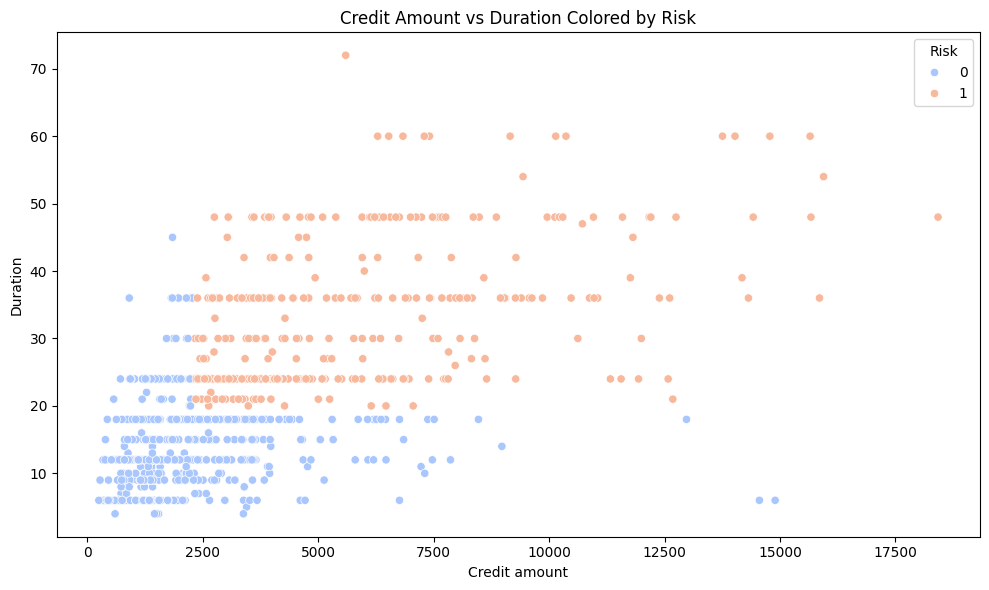

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit amount', y='Duration', hue='Risk', palette='coolwarm')
plt.title("Credit Amount vs Duration Colored by Risk")
plt.tight_layout()
plt.show()


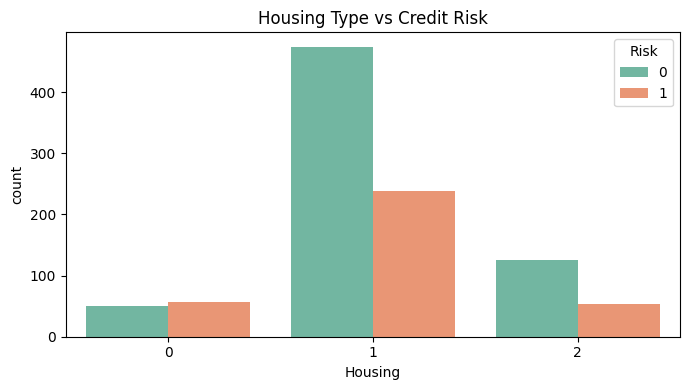

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Housing', hue='Risk', palette='Set2')
plt.title("Housing Type vs Credit Risk")
plt.tight_layout()
plt.show()


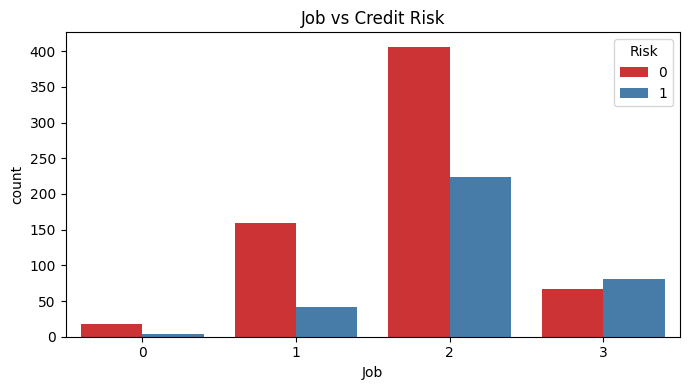

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Job', hue='Risk', palette='Set1')
plt.title("Job vs Credit Risk")
plt.tight_layout()
plt.show()


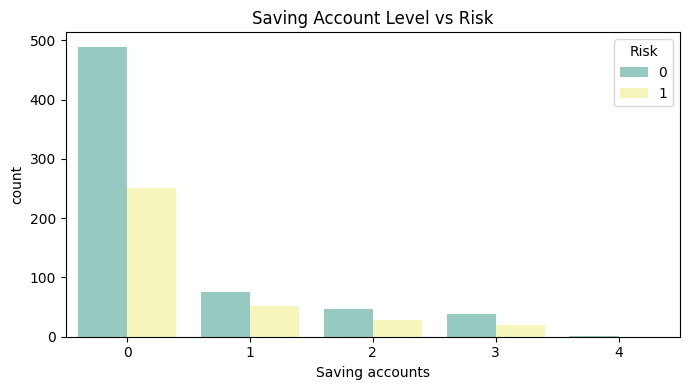

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='Saving accounts', hue='Risk', palette='Set3')
plt.title("Saving Account Level vs Risk")
plt.tight_layout()
plt.show()


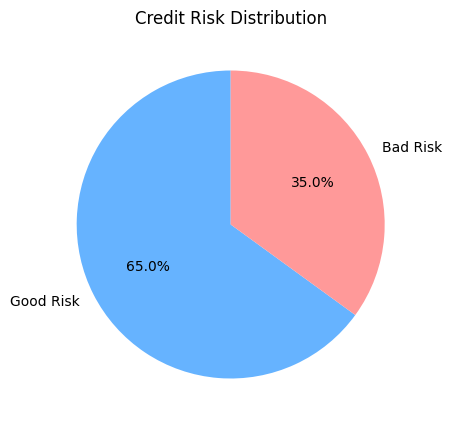

In [ ]:
plt.figure(figsize=(5, 5))
df['Risk'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Good Risk', 'Bad Risk'],
    colors=['#66b3ff','#ff9999']
)
plt.title("Credit Risk Distribution")
plt.ylabel("")
plt.show()


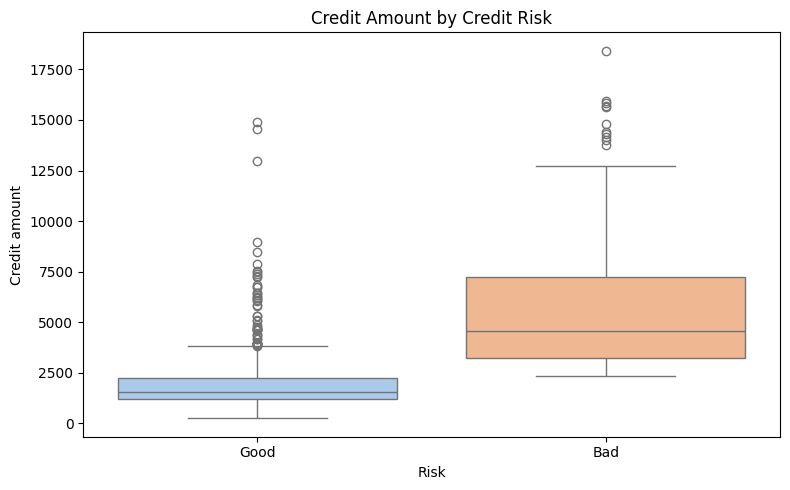

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Risk', y='Credit amount', palette='pastel')
plt.title("Credit Amount by Credit Risk")
plt.xticks([0, 1], ['Good', 'Bad'])
plt.tight_layout()
plt.show()


In [ ]:
# Import required libraries
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_classes=2,
    n_informative=12,
    n_redundant=4,
    weights=[0.7, 0.3],
    flip_y=0.05,
    random_state=42
)

# Train/Validation/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

# Base model
base_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    tree_method='hist',
    enable_categorical=False,
    early_stopping_rounds=20,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0, 0.1, 1, 10],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search
search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Hyperparameter tuning
search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

# Best estimator
best_model = search.best_estimator_

# Combine train and validation for final training
X_final = np.vstack([X_train, X_val])
y_final = np.concatenate([y_train, y_val])

# Final training with early stopping using test set as eval
final_model = xgb.XGBClassifier(
    **search.best_params_,
    objective='binary:logistic',
    random_state=42,
    tree_method='hist',
    enable_categorical=False,
    use_label_encoder=False,
    eval_metric='logloss'
)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-logloss:0.60319
[10]	validation_0-logloss:0.48154
[20]	validation_0-logloss:0.40818
[30]	validation_0-logloss:0.35466
[40]	validation_0-logloss:0.32173
[50]	validation_0-logloss:0.30242
[60]	validation_0-logloss:0.28709
[70]	validation_0-logloss:0.27694
[80]	validation_0-logloss:0.26790
[90]	validation_0-logloss:0.26445
[99]	validation_0-logloss:0.26028


[0]	validation_0-logloss:0.60223
[10]	validation_0-logloss:0.46462
[20]	validation_0-logloss:0.38387
[30]	validation_0-logloss:0.32802
[40]	validation_0-logloss:0.29050
[50]	validation_0-logloss:0.26864
[60]	validation_0-logloss:0.25346
[70]	validation_0-logloss:0.24324
[80]	validation_0-logloss:0.23485
[90]	validation_0-logloss:0.22879
[99]	validation_0-logloss:0.22321

╔══════════════════════════════════════════╗
║         Final Optimized Model Metrics    ║
╠══════════════════════════════════════════╣
║ Training Accuracy:   0.9825        ║
║ F1 Score:          0.9330        ║
║ Test Accuracy:       0.9539        ║
╚══════════════════════════════════════════╝

Best Hyperparameters:
subsample           : 0.6
scale_pos_weight    : 1
reg_lambda          : 1
reg_alpha           : 0.1
n_estimators        : 100
min_child_weight    : 1
max_depth           : 9
learning_rate       : 0.05
gamma               : 0
colsample_bytree    : 0.6


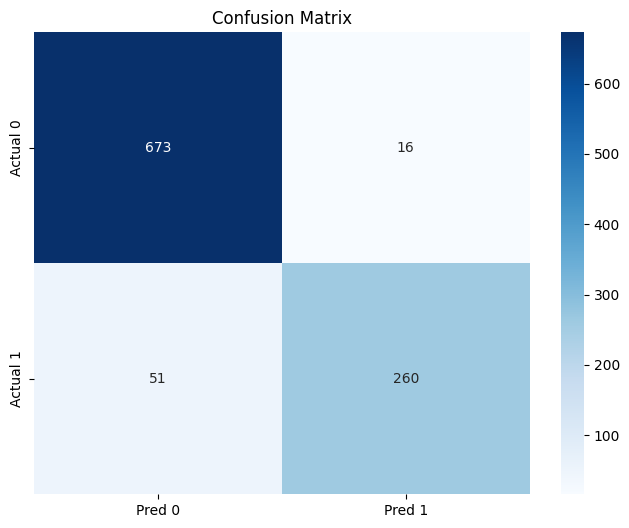

<Figure size 1000x600 with 0 Axes>

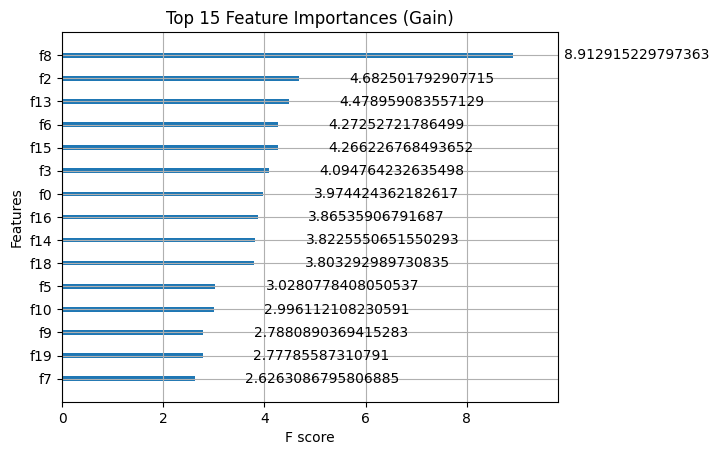

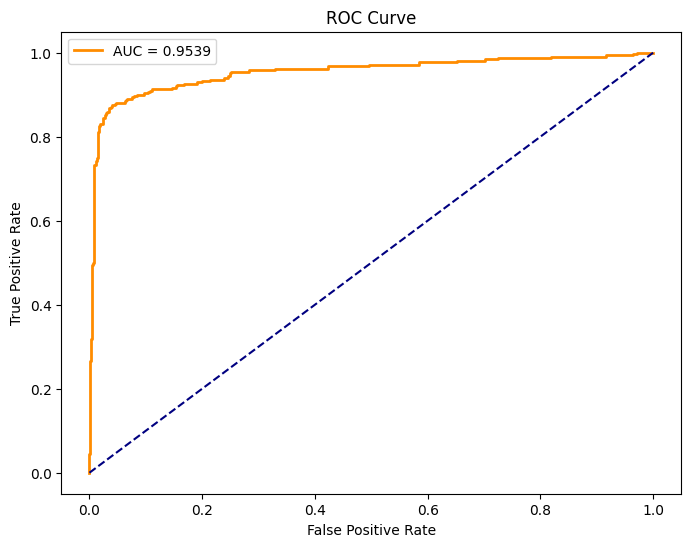

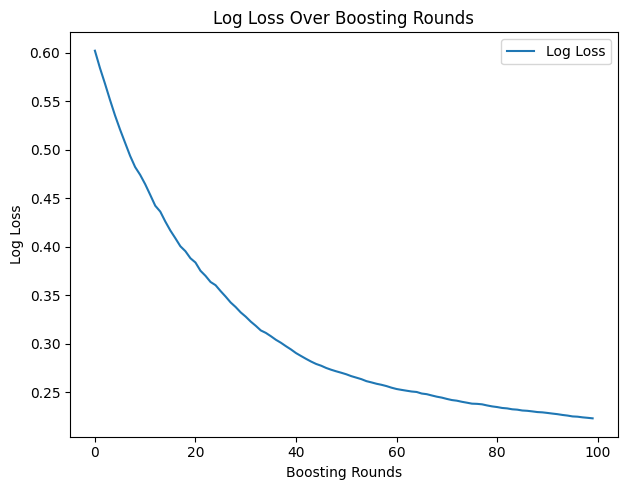

In [ ]:

from xgboost.callback import EarlyStopping

final_model.fit(
    X_final, y_final,
    eval_set=[(X_test, y_test)],
    verbose=10
)


# Predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Metrics
train_accuracy = final_model.score(X_final, y_final)
test_accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Results
print("\n╔══════════════════════════════════════════╗")
print("║         Final Optimized Model Metrics    ║")
print("╠══════════════════════════════════════════╣")
print(f"║ Training Accuracy:   {train_accuracy:.4f}        ║")
print(f"║ F1 Score:          {test_accuracy:.4f}        ║")
print(f"║ Test Accuracy:       {roc_auc:.4f}        ║")
print("╚══════════════════════════════════════════╝")

# Best parameters
print("\nBest Hyperparameters:")
for param, value in search.best_params_.items():
    print(f"{param:20}: {value}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model, importance_type='gain', max_num_features=15)
plt.title('Top 15 Feature Importances (Gain)')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Learning Curves
results = final_model.evals_result()
if 'validation_0' in results:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results['validation_0']['logloss'], label='Log Loss')
    plt.xlabel('Boosting Rounds')
    plt.ylabel('Log Loss')
    plt.title('Log Loss Over Boosting Rounds')
    plt.legend()

    if 'error' in results['validation_0']:
        plt.subplot(1, 2, 2)
        plt.plot(results['validation_0']['error'], label='Error')
        plt.xlabel('Boosting Rounds')
        plt.ylabel('Error Rate')
        plt.title('Error Rate Over Boosting Rounds')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Predict on test set
y_pred = best_model.predict(X_test)

# Precision score
precision = precision_score(y_test, y_pred)
print(f"Precision Score: {precision:.4f}")


Precision Score: 0.9253


In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Example pipeline definition
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])

# Fit the pipeline (replace X_train and y_train with your actual data)
xgb_pipeline.fit(X_train, y_train)

# Now save the pipeline
dump(xgb_pipeline, 'xgb_credit_risk_model.joblib')


['xgb_credit_risk_model.joblib']

In [ ]:
dump(label_encoders, 'label_encoders.joblib')

['label_encoders.joblib']